# **Desafio Quant Itaú** 

### O objetivo desse notebook é criar uma estratégia quantitativa de investimento baseada em cryptomoedas.

#### * *Essa é uma versão final.*

##### **1. Considerações Iniciais**

 - Pela importação dos dados ser mais simples, a biblioteca `yfinance` será usada para criação da estratégia.
 - A estratégia será dividida em dois períodos: um de otimização (no mínimo 5 anos) e o outro de teste (no mínimo 1 ano).

##### **2. Redução do Universo das Cryptomoedas**

- Para consulta de dados sobre o mercado das cryptomoedas, utilizamos a plataforma **CoinGecko**.

- No site da **CoinGecko** (https://www.coingecko.com/pt), na seção *Relatórios* da aba *Informações*, selecionamos o ***Global Crypto Classification Standard*** do ano de *2023*.

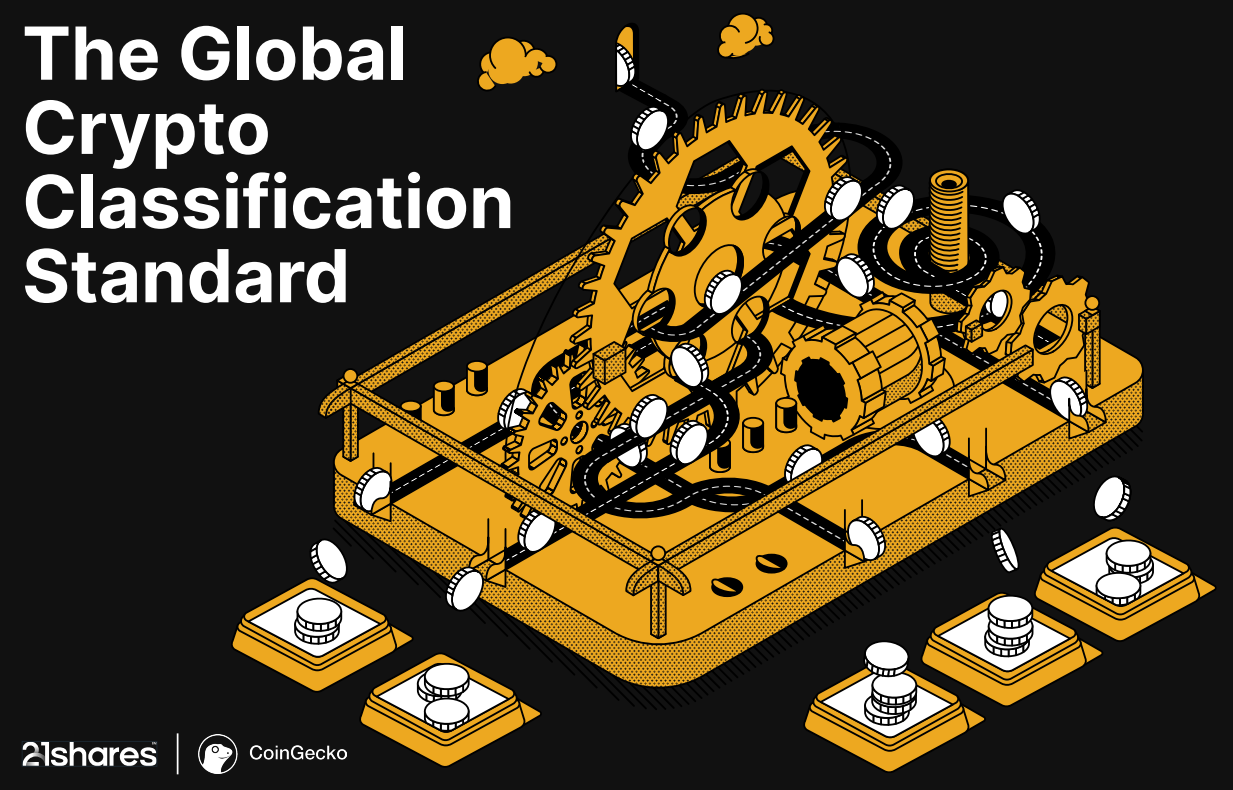

- Nas duas últimas páginas desse relatório, encontramos uma tabela com os 100 principais criptoativos listados na **CoinGecko** em 15 de julho de 2022.

- Decidimos selecionar apenas os 50 primeiros criptoativos, indicados na tabela abaixo.

### **Top 50 Cryptocurrencies - Names, Tickers, and Launch Years**

<table style="display:inline-block; margin-right: 20px;">
    <thead>
        <tr>
            <th>Name</th>
            <th>Ticker</th>
            <th>Launch Year</th>
        </tr>
    </thead>
    <tbody>
        <tr><td>Bitcoin</td><td>BTC</td><td>2009</td></tr>
        <tr><td>Ethereum</td><td>ETH</td><td>2015</td></tr>
        <tr><td>Tether</td><td>USDT</td><td>2014</td></tr>
        <tr><td>USD Coin</td><td>USDC</td><td>2018</td></tr>
        <tr><td>BNB</td><td>BNB</td><td>2017</td></tr>
        <tr><td>Binance USD</td><td>BUSD</td><td>2019</td></tr>
        <tr><td>Cardano</td><td>ADA</td><td>2017</td></tr>
        <tr><td>XRP</td><td>XRP</td><td>2012</td></tr>
        <tr><td>Solana</td><td>SOL</td><td>2020</td></tr>
        <tr><td>Polkadot</td><td>DOT</td><td>2020</td></tr>
        <tr><td>Dogecoin</td><td>DOGE</td><td>2013</td></tr>
        <tr><td>Dai</td><td>DAI</td><td>2017</td></tr>
        <tr><td>Wrapped Bitcoin</td><td>WBTC</td><td>2019</td></tr>
        <tr><td>TRON</td><td>TRX</td><td>2017</td></tr>
        <tr><td>Lido Staked Ether</td><td>STETH</td><td>2020</td></tr>
        <tr><td>Shiba Inu</td><td>SHIB</td><td>2020</td></tr>
        <tr><td>LEO Token</td><td>LEO</td><td>2019</td></tr>
        <tr><td>Avalanche</td><td>AVAX</td><td>2020</td></tr>
        <tr><td>FTX</td><td>FTT</td><td>2019</td></tr>
        <tr><td>Litecoin</td><td>LTC</td><td>2011</td></tr>
        <tr><td>Cronos</td><td>CRO</td><td>2018</td></tr>
        <tr><td>Polygon</td><td>MATIC</td><td>2017</td></tr>
        <tr><td>Chainlink</td><td>LINK</td><td>2017</td></tr>
        <tr><td>OKB</td><td>OKB</td><td>2018</td></tr>
        <tr><td>Chain</td><td>XCN</td><td>2022</td></tr>
    </tbody>
</table>

<table style="display:inline-block;">
    <thead>
        <tr>
            <th>Name</th>
            <th>Ticker</th>
            <th>Launch Year</th>
        </tr>
    </thead>
    <tbody>
        <tr><td>Stellar</td><td>XLM</td><td>2014</td></tr>
        <tr><td>Monero</td><td>XMR</td><td>2014</td></tr>
        <tr><td>Bitcoin Cash</td><td>BCH</td><td>2017</td></tr>
        <tr><td>NEAR Protocol</td><td>NEAR</td><td>2020</td></tr>
        <tr><td>Algorand</td><td>ALGO</td><td>2019</td></tr>
        <tr><td>Ethereum Classic</td><td>ETC</td><td>2016</td></tr>
        <tr><td>Cosmos Hub</td><td>ATOM</td><td>2019</td></tr>
        <tr><td>Theta Fuel</td><td>TFUEL</td><td>2019</td></tr>
        <tr><td>VeChain</td><td>VET</td><td>2015</td></tr>
        <tr><td>Flow</td><td>FLOW</td><td>2020</td></tr>
        <tr><td>Uniswap</td><td>UNI</td><td>2020</td></tr>
        <tr><td>Frax</td><td>FRAX</td><td>2020</td></tr>
        <tr><td>Hedera</td><td>HBAR</td><td>2019</td></tr>
        <tr><td>Tezos</td><td>XTZ</td><td>2018</td></tr>
        <tr><td>Internet Computer</td><td>ICP</td><td>2021</td></tr>
        <tr><td>Decentraland</td><td>MANA</td><td>2020</td></tr>
        <tr><td>TrueUSD</td><td>TUSD</td><td>2018</td></tr>
        <tr><td>Theta Network</td><td>THETA</td><td>2018</td></tr>
        <tr><td>Filecoin</td><td>FIL</td><td>2020</td></tr>
        <tr><td>KuCoin</td><td>KCS</td><td>2017</td></tr>
        <tr><td>Axie Infinity</td><td>AXS</td><td>2018</td></tr>
        <tr><td>The Sandbox</td><td>SAND</td><td>2020</td></tr>
        <tr><td>ApeCoin</td><td>APE</td><td>2022</td></tr>
        <tr><td>cUSDC</td><td>CUSDC</td><td>2020</td></tr>
        <tr><td>Elrond</td><td>EGLD</td><td>2020</td></tr>
    </tbody>
</table>


##### **3. Montando a Carteira**

- A ideia da nossa carteira é ser uma alternativa a hegemonia do **BitCoin** e do **Ethereum**.

- Como o período de otimização deve ter no mínimo $5$ anos e o de teste $1$ ano, definimos:
    - **Período de Otimização**: *30/12/2017* a *30/12/2021*
    - **Período de Teste**: *30/12/2021* a *30/12/2023*

- Assim, selecionamos apenas as cryptos lançadas até 2017:

### **Cryptocurrencies Launched Until 2017 - Names, Tickers, and Launch Years**

<table style="display:inline-block; margin-right: 20px;">
    <thead>
        <tr>
            <th>Name</th>
            <th>Ticker</th>
            <th>Launch Year</th>
        </tr>
    </thead>
    <tbody>
        <tr><td>Bitcoin</td><td>BTC</td><td>2009</td></tr>
        <tr><td>Ethereum</td><td>ETH</td><td>2015</td></tr>
        <tr><td>Tether</td><td>USDT</td><td>2014</td></tr>
        <tr><td>XRP</td><td>XRP</td><td>2012</td></tr>
        <tr><td>Dogecoin</td><td>DOGE</td><td>2013</td></tr>
        <tr><td>Litecoin</td><td>LTC</td><td>2011</td></tr>
        <tr><td>Cardano</td><td>ADA</td><td>2017</td></tr>
        <tr><td>BNB</td><td>BNB</td><td>2017</td></tr>
        <tr><td>TRON</td><td>TRX</td><td>2017</td></tr>
        <tr><td>Monero</td><td>XMR</td><td>2014</td></tr>
        <tr><td>Stellar</td><td>XLM</td><td>2014</td></tr>
        <tr><td>Bitcoin Cash</td><td>BCH</td><td>2017</td></tr>
        <tr><td>Polygon</td><td>MATIC</td><td>2017</td></tr>
        <tr><td>Chainlink</td><td>LINK</td><td>2017</td></tr>
        <tr><td>Ethereum Classic</td><td>ETC</td><td>2016</td></tr>
    </tbody>
</table>

<table style="display:inline-block;">
    <thead>
        <tr>
            <th>Name</th>
            <th>Ticker</th>
            <th>Launch Year</th>
        </tr>
    </thead>
    <tbody>
        <tr><td>VeChain</td><td>VET</td><td>2015</td></tr>
        <tr><td>Dash</td><td>DASH</td><td>2014</td></tr>
        <tr><td>Zcash</td><td>ZEC</td><td>2016</td></tr>
        <tr><td>NEM</td><td>XEM</td><td>2015</td></tr>
        <tr><td>Qtum</td><td>QTUM</td><td>2017</td></tr>
        <tr><td>EOS</td><td>EOS</td><td>2017</td></tr>
        <tr><td>Bytecoin</td><td>BCN</td><td>2014</td></tr>
        <tr><td>Decred</td><td>DCR</td><td>2016</td></tr>
        <tr><td>Neo</td><td>NEO</td><td>2014</td></tr>
        <tr><td>Waves</td><td>WAVES</td><td>2016</td></tr>
        <tr><td>Stratis</td><td>STRAX</td><td>2016</td></tr>
        <tr><td>Lisk</td><td>LSK</td><td>2016</td></tr>
        <tr><td>IOTA</td><td>MIOTA</td><td>2015</td></tr>
        <tr><td>Factom</td><td>FCT</td><td>2015</td></tr>
        <tr><td>Augur</td><td>REP</td><td>2015</td></tr>
    </tbody>
</table>


- Vamos, então, plotar um mapa de calor, considerando o período de otimização, entre as cryptos e usá-lo para selecionar as que farão parte da carteira.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

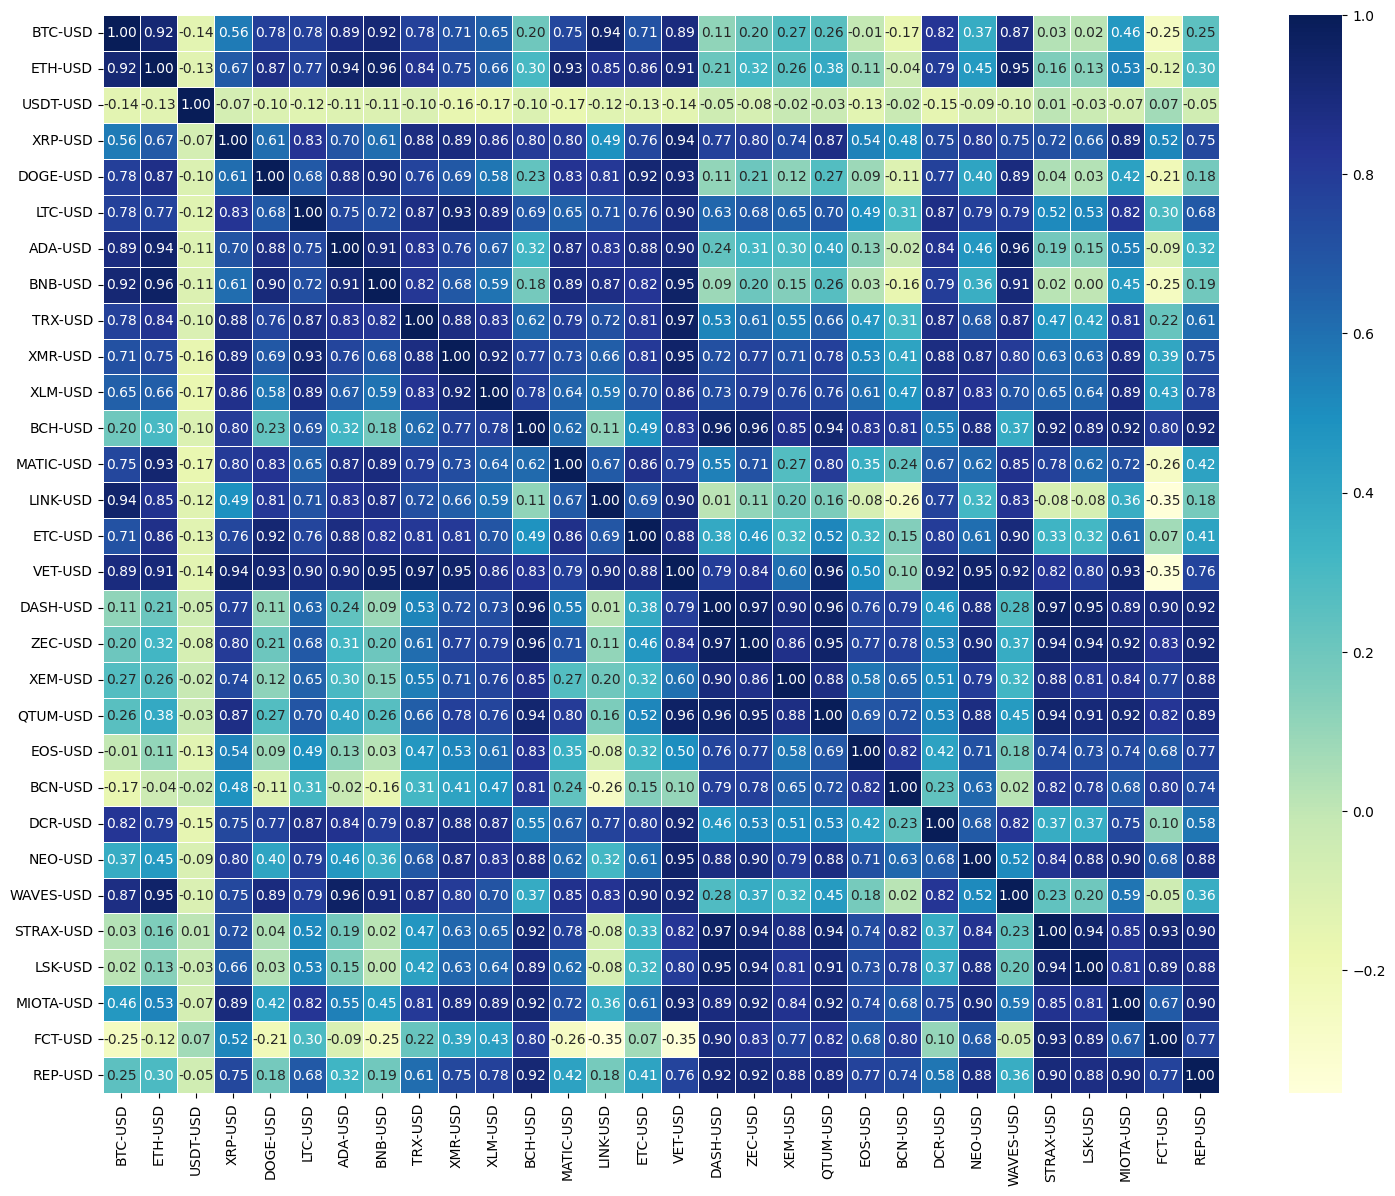

In [2]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de tickers das criptomoedas junto com o BitCoin
tickers = [
    "BTC-USD", "ETH-USD", "USDT-USD", "XRP-USD", 
    "DOGE-USD", "LTC-USD", "ADA-USD", "BNB-USD", 
    "TRX-USD", "XMR-USD", "XLM-USD", "BCH-USD", 
    "MATIC-USD", "LINK-USD", "ETC-USD", "VET-USD", 
    "DASH-USD", "ZEC-USD", "XEM-USD", "QTUM-USD", 
    "EOS-USD", "BCN-USD", "DCR-USD", "NEO-USD", 
    "WAVES-USD", "STRAX-USD", "LSK-USD", "MIOTA-USD", 
    "FCT-USD", "REP-USD"
]

# Inicializar um DataFrame vazio para armazenar os dados de fechamento ajustado
corr_crypto = pd.DataFrame()

# Baixar dados de fechamento ajustado para todas as criptomoedas e adicionar ao DataFrame
for ticker in tickers:
    dados = yf.download(ticker, start="2017-12-30", end="2021-12-30", interval="1d")["Adj Close"]
    corr_crypto[ticker] = dados

# Calcular a matriz de correlação
correlation_matrix = corr_crypto.corr()

# Plotar o mapa de calor da correlação
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.show()


- Como queremos superar o ``BTC`` e o ``ETH``, precisamos selecionar cryptos com baixa correlação com o **BitCoin** e o ``ETH``.

- Assim, vamos selecionar cryptos com correlação $\leq |0.3|$ com **BitCoin** e **Ethereum**.

In [3]:
# Obter as correlações absolutas em relação ao Bitcoin e Ethereum
btc_correlation = correlation_matrix["BTC-USD"].abs()
eth_correlation = correlation_matrix["ETH-USD"].abs()

# Filtrar criptomoedas com correlação absoluta <= 0,3 com Bitcoin
low_corr_btc = btc_correlation[btc_correlation <= 0.3].index

# Filtrar criptomoedas com correlação absoluta <= 0,3 com Ethereum
low_corr_eth = eth_correlation[eth_correlation <= 0.3].index

# Interseção entre as criptomoedas que atendem aos critérios para ambos
low_corr_both = list(set(low_corr_btc) & set(low_corr_eth))

# Exibir as criptomoedas selecionadas
print("Criptomoedas com correlação absoluta <= 0.3 com Bitcoin e Ethereum:")
print(low_corr_both)

Criptomoedas com correlação absoluta <= 0.3 com Bitcoin e Ethereum:
['STRAX-USD', 'BCN-USD', 'USDT-USD', 'XEM-USD', 'DASH-USD', 'LSK-USD', 'REP-USD', 'FCT-USD', 'EOS-USD']


- **Carteira:**

`Stratis (STRAX-USD)`    `ByteCoin (BCN-USD)`  `Tether (USDT-USD)`  `NEM (XEM-USD)`   `Dash (DASH-USD)`

`Lisk(LSK-USD)`   `Augur(REP-USD)`   `Factom(FCT-USD)` `EOS(EOS-USD)`

##### **4. Calculando os Pesos de cada Crypto**

- O peso de cada ativo na carteira será atribuído com base na variação absoluta de preço.

- A ideia é atribuir um peso maior para a crypto com maior variação do preço de fechamento ajustado no período de otimização.

In [27]:
import yfinance as yf
import pandas as pd

# Lista de criptomoedas a serem analisadas
#cryptos = ['BCN-USD', 'ETH-USD', 'EOS-USD', 'FCT-USD', 'LSK-USD', 'XEM-USD', 'STRAX-USD', 'USDT-USD', 'DASH-USD', 'REP-USD']
cryptos = ['BCN-USD', 'EOS-USD', 'FCT-USD', 'LSK-USD', 'XEM-USD', 'STRAX-USD', 'USDT-USD', 'DASH-USD', 'REP-USD']
# DataFrame para armazenar o preço de fechamento ajustado
performance_data = pd.DataFrame()

# Baixar dados históricos de preços para as criptomoedas
for crypto in cryptos:
    data = yf.download(crypto, start="2017-12-30", end="2021-12-30", interval="1d")["Adj Close"]
    performance_data[crypto] = data

# Remover criptos com dados faltantes
performance_data.dropna(axis=1, inplace=True)

# Calcular o desempenho histórico (% crescimento acumulado)
initial_prices = performance_data.iloc[0]  # Preços iniciais (primeiro dia)
final_prices = performance_data.iloc[-1]  # Preços finais (último dia)
performance = ((final_prices - initial_prices) / initial_prices).abs().dropna()

# Normalizar os desempenhos para atribuir pesos
weights = performance / performance.sum()* 100

# Exibir os pesos em porcentagem
weights

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BCN-USD      13.928880
EOS-USD       9.453410
FCT-USD      14.190597
LSK-USD      12.859211
XEM-USD      12.666801
STRAX-USD    13.092094
USDT-USD      0.301561
DASH-USD     12.699402
REP-USD      10.808046
dtype: float64

##### **5. Definição do Tipo de Estratégia**

- ***Estratégia de Média Móvel Simples:***
    - Consideração de duas médias móveis para cada ativo: uma de curto prazo (mais rápida) e uma de longo prazo (mais lenta);
    - A lógica é comprar um ativo quando a média móvel curta ultrapassa a média móvel longa (indicando uma tendência de alta) e vender quando ocorre o contrário (indicando uma tendência de baixa);
    

[*********************100%***********************]  9 of 9 completed
C:\Users\lucas\AppData\Local\Temp\ipykernel_8400\3068745948.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['Signal'][short_window:] = np.where(signals['Short_

Melhor janela para BCN-USD: Curta=10, Longa=150
Melhor janela para EOS-USD: Curta=10, Longa=100
Melhor janela para FCT-USD: Curta=10, Longa=100


C:\Users\lucas\AppData\Local\Temp\ipykernel_8400\3068745948.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['Signal'][short_window:] = np.where(signals['Short_MA'][short_window:] > signals['Long_MA'][short_window:], 1.0, -1.0)
C

Melhor janela para LSK-USD: Curta=20, Longa=250
Melhor janela para XEM-USD: Curta=40, Longa=100
Melhor janela para STRAX-USD: Curta=10, Longa=100
Melhor janela para USDT-USD: Curta=10, Longa=250


C:\Users\lucas\AppData\Local\Temp\ipykernel_8400\3068745948.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['Signal'][short_window:] = np.where(signals['Short_MA'][short_window:] > signals['Long_MA'][short_window:], 1.0, -1.0)
C

Melhor janela para DASH-USD: Curta=10, Longa=100
Melhor janela para REP-USD: Curta=10, Longa=200


C:\Users\lucas\AppData\Local\Temp\ipykernel_8400\3068745948.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['Signal'][short_window:] = np.where(signals['Short_MA'][short_window:] > signals['Long_MA'][short_window:], 1.0, -1.0)
C


Retornos da estratégia de média móvel no período de teste:
BCN-USD: 8.27%
EOS-USD: 39.70%
FCT-USD: 51.56%
LSK-USD: 1.57%
XEM-USD: 0.30%
STRAX-USD: 31.27%
USDT-USD: 0.52%
DASH-USD: -10.44%
REP-USD: -12.14%

Retorno total da carteira: 14.72%


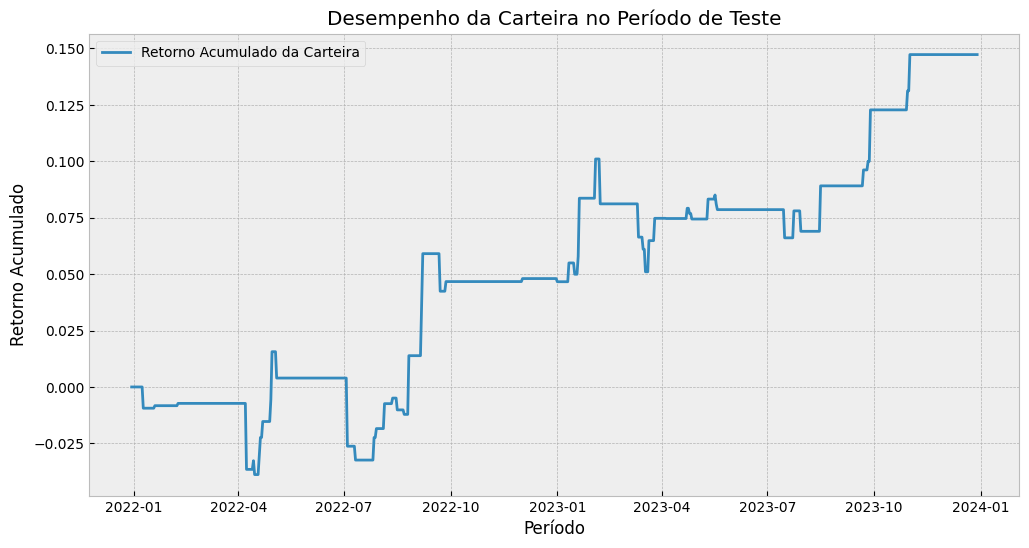

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configurações da estratégia
tickers = ['BCN-USD', 'EOS-USD', 'FCT-USD', 'LSK-USD', 'XEM-USD', 'STRAX-USD', 'USDT-USD', 'DASH-USD', 'REP-USD']
start_date_train = "2017-12-30"
end_date_train = "2021-12-30"
start_date_test = "2021-12-30"
end_date_test = "2023-12-30"

# Função para executar a estratégia de média móvel
def moving_average_strategy(data, short_window=50, long_window=200):
    signals = pd.DataFrame(index=data.index)
    signals['Price'] = data
    signals['Short_MA'] = data.rolling(window=short_window).mean()
    signals['Long_MA'] = data.rolling(window=long_window).mean()
    signals['Signal'] = 0.0

    # Gerar sinais de compra (+1) e venda (-1)
    signals['Signal'][short_window:] = np.where(signals['Short_MA'][short_window:] > signals['Long_MA'][short_window:], 1.0, -1.0)
    signals['Position'] = signals['Signal'].diff()  # Identifica mudanças nos sinais

    return signals

# Baixar dados históricos de treinamento
dados_train = yf.download(tickers, start=start_date_train, end=end_date_train, interval="1d")["Adj Close"]

# Otimizar a estratégia para encontrar os melhores parâmetros de janela
best_params = {}
for ticker in tickers:
    data = dados_train[ticker].dropna()
    best_return = -np.inf
    best_short_window = None
    best_long_window = None
    
    for short_window in range(10, 60, 10):
        for long_window in range(100, 300, 50):
            signals = moving_average_strategy(data, short_window, long_window)
            returns = (1 + signals['Position'] * data.pct_change().clip(lower=-1, upper=1)).cumprod().iloc[-1] - 1
            
            if returns > best_return:
                best_return = returns
                best_short_window = short_window
                best_long_window = long_window
    
    best_params[ticker] = (best_short_window, best_long_window)
    print(f"Melhor janela para {ticker}: Curta={best_short_window}, Longa={best_long_window}")

# Testar a estratégia com os melhores parâmetros
dados_test = yf.download(tickers, start=start_date_test, end=end_date_test, interval="1d")["Adj Close"]
strategy_results = {}
portfolio_returns = pd.DataFrame(index=dados_test.index)

pesos = {
    "BCN-USD": 0.13928880,
    "EOS-USD": 0.09453410,
    "FCT-USD": 0.14190597,
    "LSK-USD": 0.12859211,
    "XEM-USD": 0.12666801,
    "STRAX-USD": 0.13092094,
    "USDT-USD": 0.00301561,
    "DASH-USD": 0.12699402,
    "REP-USD": 0.10808046
}

for ticker in tickers:
    data_test = dados_test[ticker].dropna()
    short_window, long_window = best_params[ticker]
    signals = moving_average_strategy(data_test, short_window, long_window)
    
    # Calcular os retornos da estratégia
    daily_returns = data_test.pct_change().clip(lower=-1, upper=1)
    signals['Strategy_Returns'] = signals['Position'] * daily_returns
    
    strategy_results[ticker] = (1 + signals['Strategy_Returns']).cumprod() - 1
    portfolio_returns[ticker] = signals['Strategy_Returns']

# Calcular o retorno da carteira
portfolio_returns['Total_Returns'] = portfolio_returns.mul(list(pesos.values()), axis=1).sum(axis=1)
portfolio_cumulative_returns = (1 + portfolio_returns['Total_Returns']).cumprod() - 1

print("\nRetornos da estratégia de média móvel no período de teste:")
for ticker, returns in strategy_results.items():
    print(f"{ticker}: {returns.iloc[-1]:.2%}")

print(f"\nRetorno total da carteira: {portfolio_cumulative_returns.iloc[-1]:.2%}")

# Gráfico do retorno total da carteira
plt.style.use('bmh')
plt.figure(figsize=(12, 6))
plt.plot(portfolio_cumulative_returns, label="Retorno Acumulado da Carteira")
plt.title("Desempenho da Carteira no Período de Teste")
plt.xlabel("Período")
plt.ylabel("Retorno Acumulado")
plt.legend()
plt.show()


- **Explicação Detalhada**:
    - *Estratégia de Média Móvel*: Definimos a função ``moving_average_strategy`` que calcula as médias móveis de curto e longo prazo e gera sinais de compra e venda.
    - *Otimização*: Testamos várias combinações de períodos para as médias móveis curtas (10 a 50 dias) e longas (100 a 250 dias) e escolhemos a combinação que maximiza o retorno cumulativo no   período de otimização.
    - *Teste da Estratégia*: Usamos os parâmetros otimizados para cada criptomoeda e aplicamos a estratégia no período de teste.
    - *Resultados*: Calculamos e exibimos o retorno acumulado da estratégia de média móvel para cada criptomoeda e para a carteira durante o período de teste.

- Vamos plotar os retornos diários da estratégia.

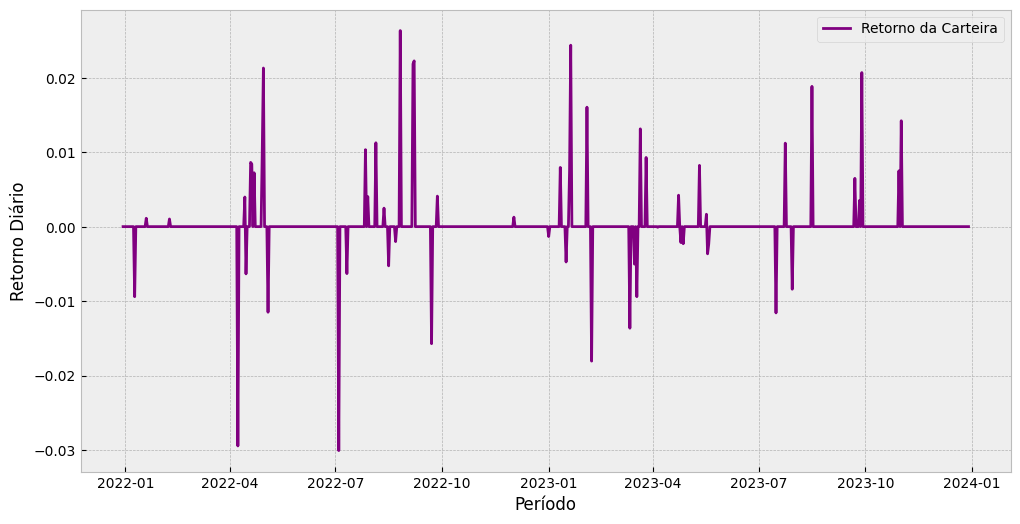

In [11]:
plt.style.use('bmh')
plt.figure(figsize=(12, 6))
plt.plot(portfolio_returns['Total_Returns'], label='Retorno da Carteira', color='purple')
plt.xlabel("Período")
plt.ylabel("Retorno Diário")
plt.legend()
plt.show()

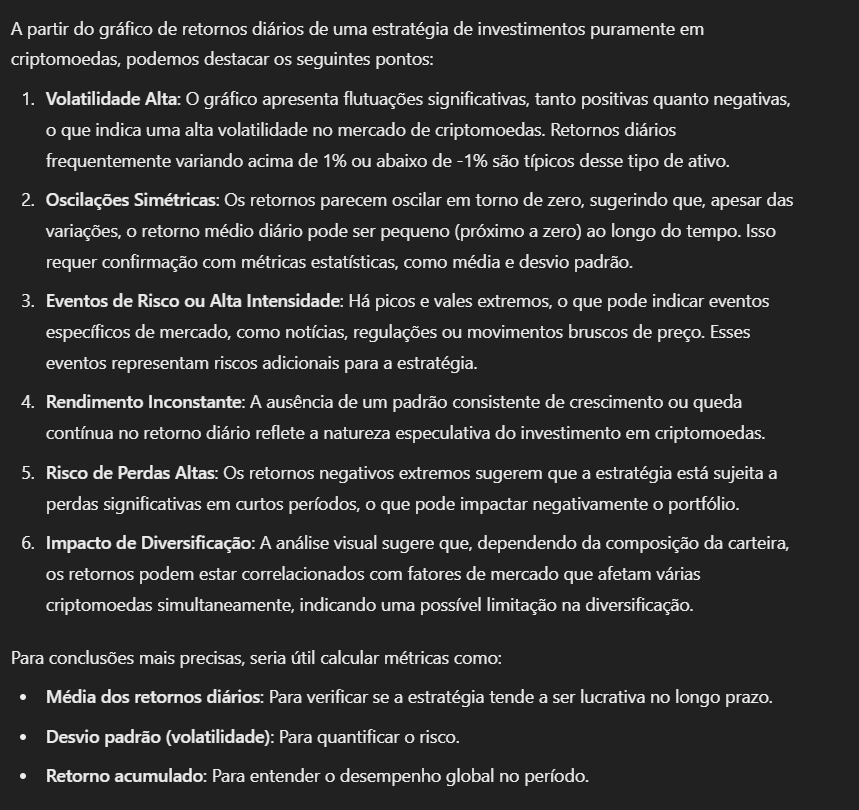

- Vamos agora calcular as volatilidades diária, anualizada e total da estratégia.

In [14]:
# Volatilidade diária (desvio padrão dos retornos diários)
volatilidade_diaria = (portfolio_returns['Total_Returns'].std())
print(f"Volatilidade diária: {volatilidade_diaria * 100:.2f}%")

# Volatilidade anualizada
volatilidade_anualizada = (volatilidade_diaria * (252 ** 0.5))
print(f"Volatilidade anualizada: {volatilidade_anualizada * 100:.2f}%")

# Volatilidade total no período de 2 anos
volatilidade_total = (volatilidade_diaria * ((2 * 252) ** 0.5))
print(f"Volatilidade total (2 anos): {volatilidade_total * 100:.2f}%")

Volatilidade diária: 0.34%
Volatilidade anualizada: 5.41%
Volatilidade total (2 anos): 7.64%


- Por fim, vamos calcular o *Indice de Sharp* anual da carteira, considerando duas diferentes taxas livres de risco.

- A primeira taxa é o ***Federal Funds Rate***, a taxa básica de juros dos EUA, acumulada de *30/12/2021* a *30/12/2023*, segundo a plataforma **FRED** (https://fred.stlouisfed.org/).

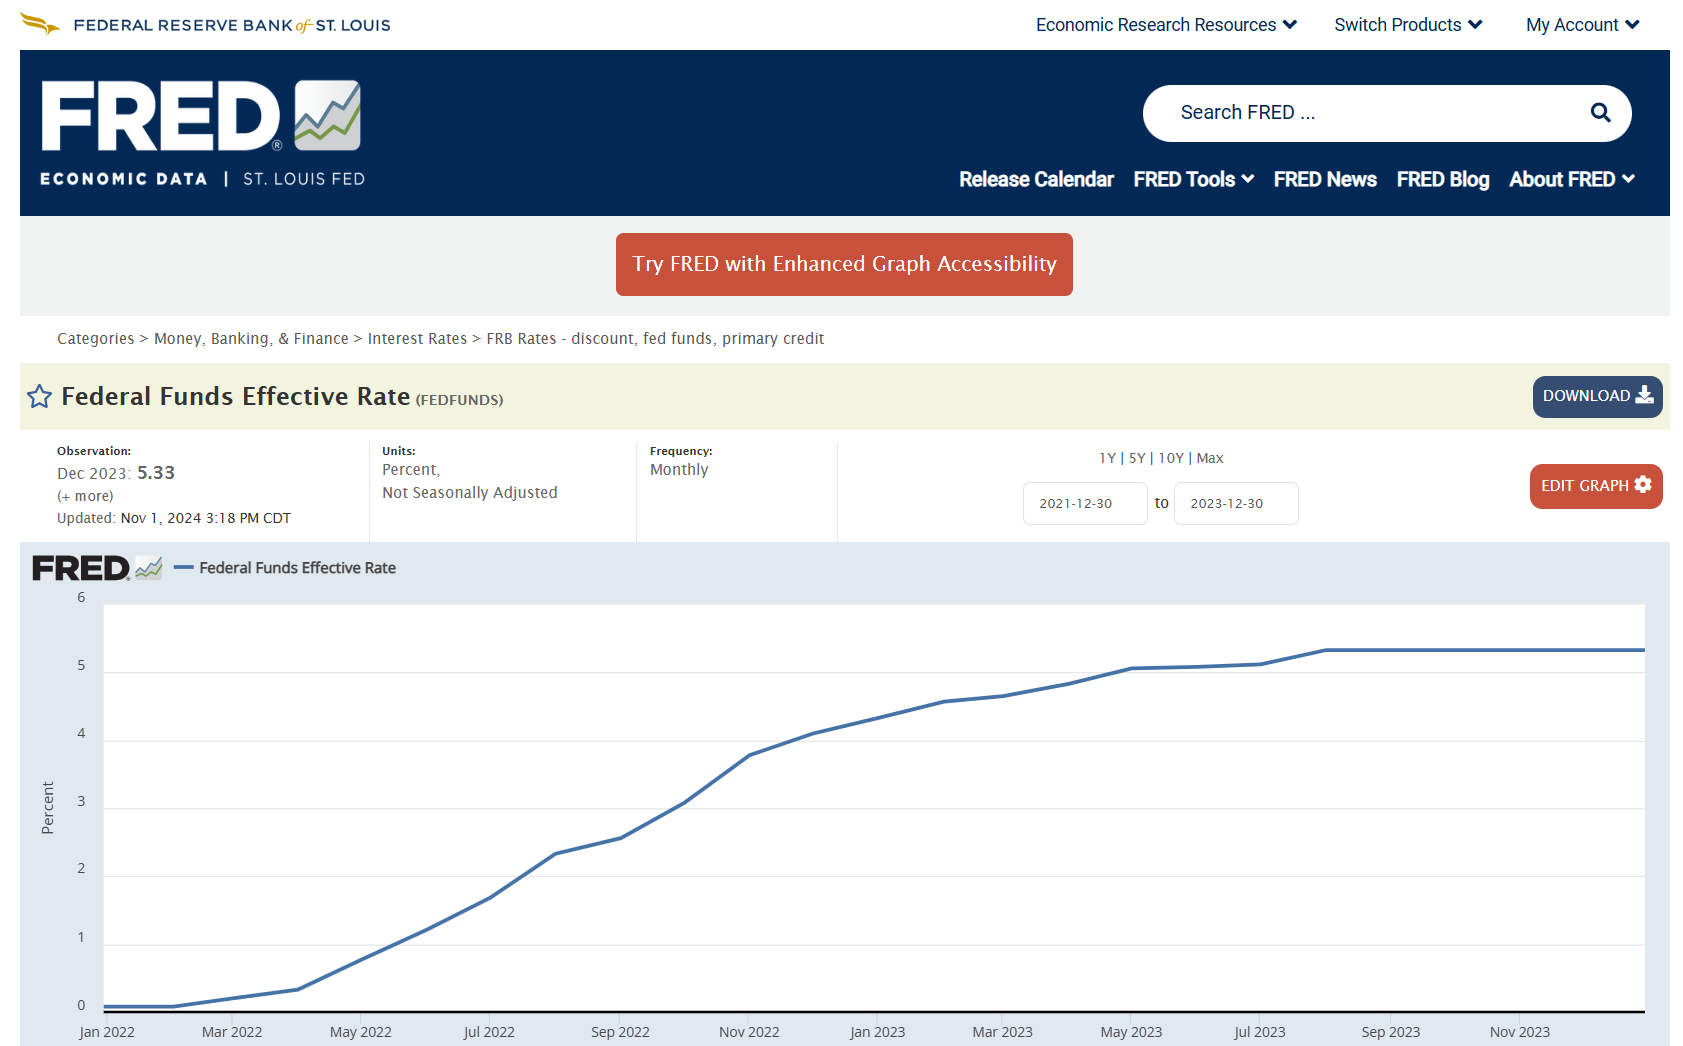
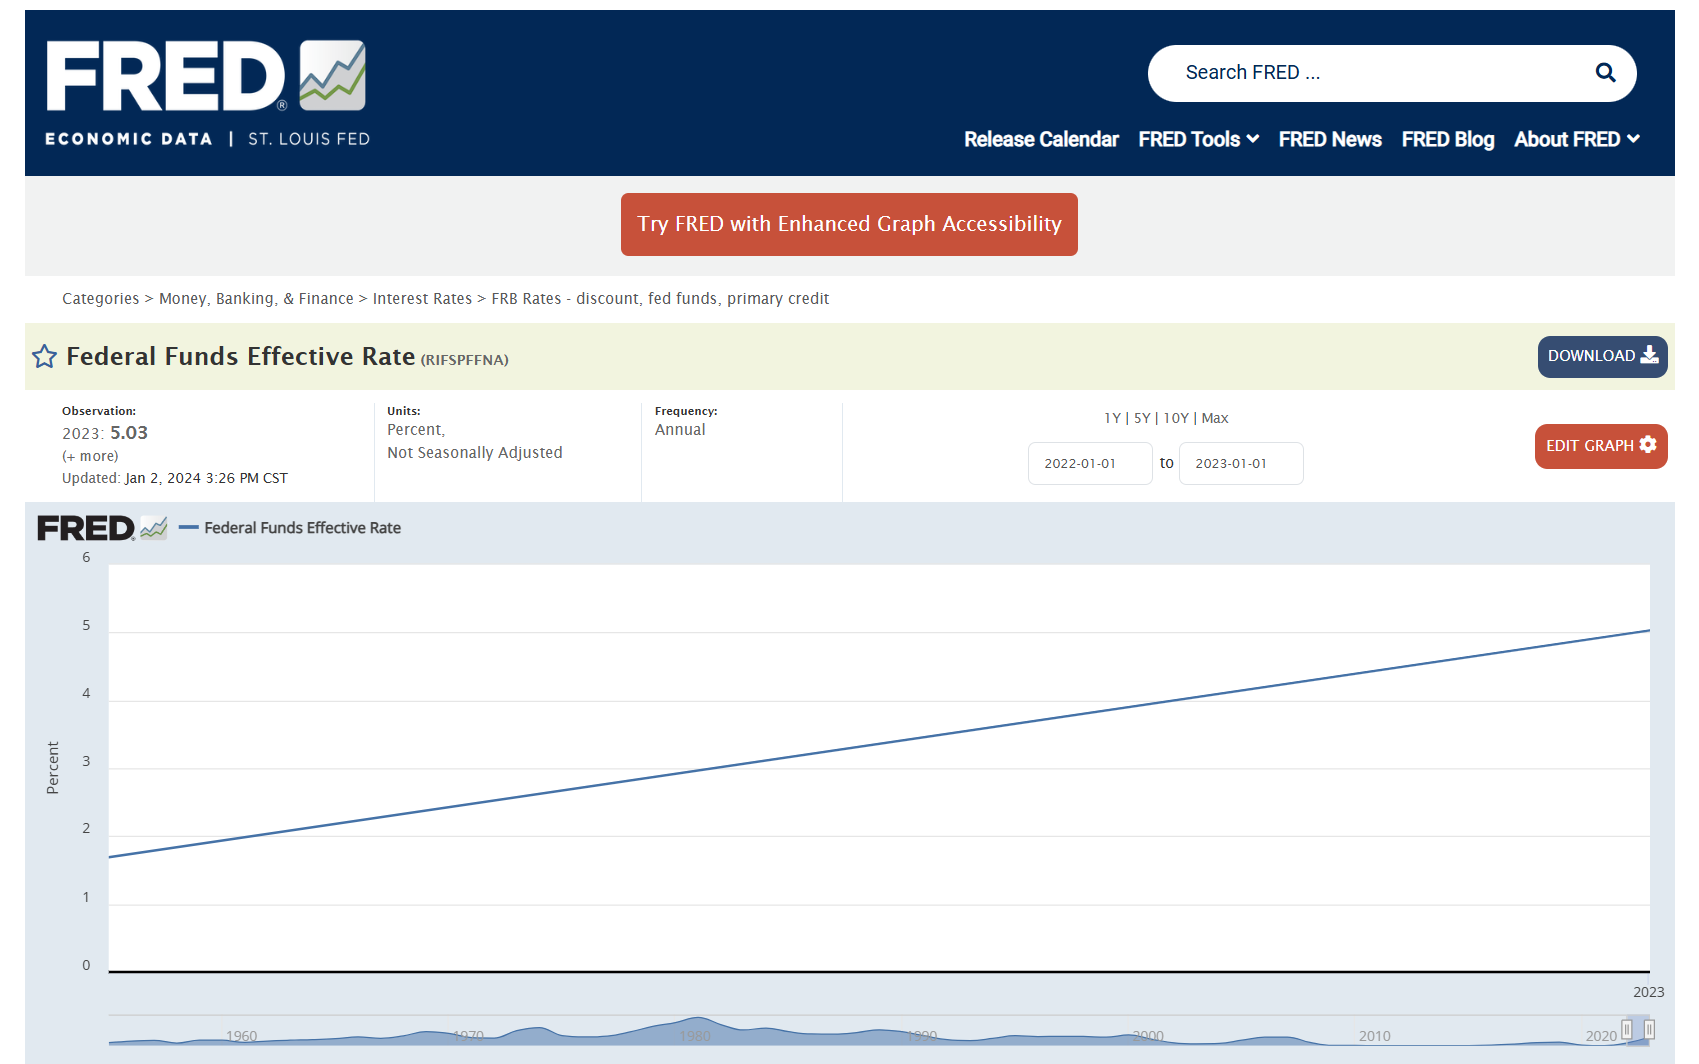
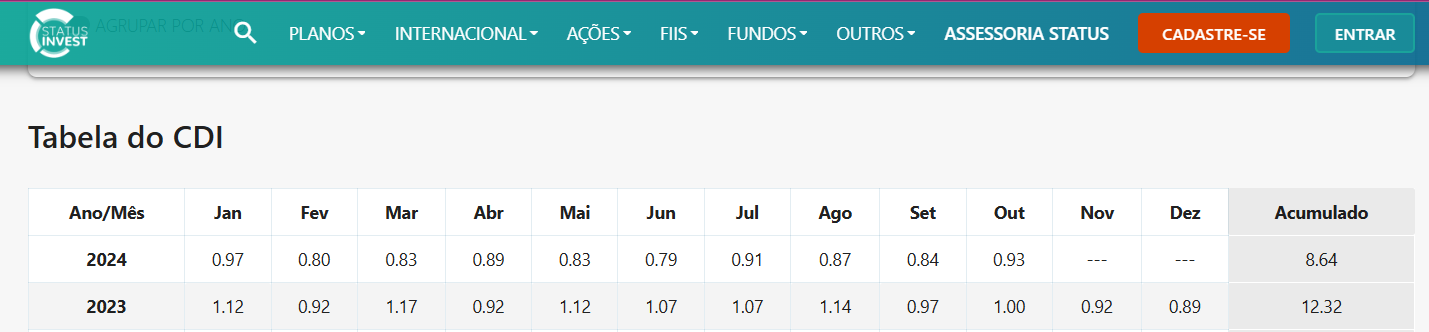

In [15]:
# Pegando o retorno total da estrategia no periodo de teste
retorno_estrategia = portfolio_cumulative_returns.iloc[-1]

# Taxa de risco livre
risk_free_rate_anual = (5.33/100)

# Sharpe Ratio anual
sharpe_anual_FFR = (retorno_estrategia - risk_free_rate_anual) / volatilidade_total
print(f"Sharpe Ratio anual: {sharpe_anual_FFR:.2f}")

Sharpe Ratio anual: 1.23


- Relação retorno-risco sólida

- A segunda taxa será relacionada ao índice **CMC200**.

[*********************100%***********************]  1 of 1 completed


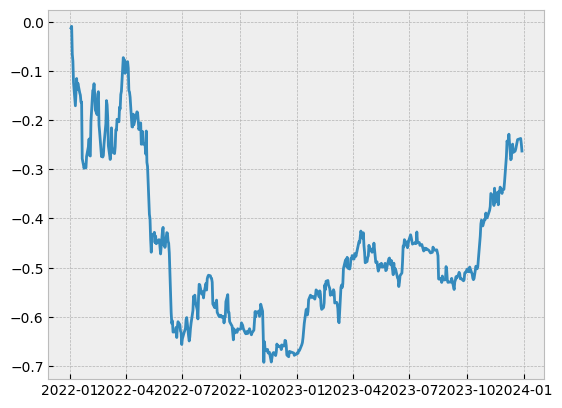

In [17]:
# Baixar dados históricos do CMC200 (índice de referência)
cmc200_data = yf.download("^CMC200", start="2021-12-30", end="2023-12-30", interval="1d")["Adj Close"]

# Calcular os retornos diários do índice
cmc200_returns = cmc200_data.pct_change().dropna()

# Calcular o retorno acumulado do índice
ret_acumulado_cmc200 = ((1 + cmc200_returns).cumprod()) - 1

plt.plot(ret_acumulado_cmc200)
plt.show()

In [15]:
# Baixar dados históricos do CMC200 (índice de referência)
cmc200_data = yf.download("^CMC200", start="2021-12-30", end="2023-12-30", interval="1d")["Adj Close"]

# Calcular os retornos diários do índice
cmc200_returns = cmc200_data.pct_change().dropna()

# Calcular o retorno acumulado do índice
ret_acumulado_cmc200 = ((1 + cmc200_returns).cumprod()) - 1

# Pegar o retorno o último retorno acumulado do USDC em 2022
free_stable = ret_acumulado_cmc200.iloc[-1].item()

# Sharpe Ratio anual
sharpe_anual_cmc200 = (retorno_estrategia - free_stable) / volatilidade_anualizada
print(f"Sharpe Ratio anual: {sharpe_anual_cmc200}")


[*********************100%***********************]  1 of 1 completed

Sharpe Ratio anual: 7.583229042623988


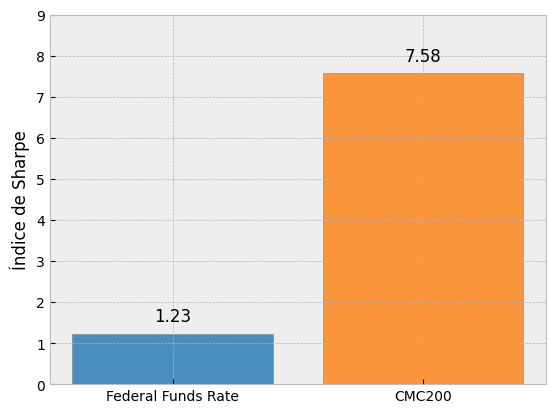

In [32]:
import matplotlib.pyplot as plt

# Dados dos índices de Sharpe
labels = ["Federal Funds Rate", "CMC200"]
sharpe_values = [1.23, 7.58]
colors = ['#1f77b4', '#ff7f0e']

# Configurações do gráfico

#plt.figure(figsize=(8, 6))
bars = plt.bar(labels, sharpe_values, color=colors, edgecolor='grey', alpha=0.8)

# Adiciona os valores no topo das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.2, f'{height:.2f}', ha='center', va='bottom', fontsize=12)

# Configurações estéticas
plt.ylabel("Índice de Sharpe", fontsize=12)
#lt.xticks(fontsize=11)
#plt.yticks(fontsize=11)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 9)  # Para ajustar o espaço acima da barra mais alta

# Exibe o gráfico

plt.show()

- Assim, devido ao Índice Sharpe muito maior do que $1$, concluimos que nossa carteira está gerando um retorno ajustado ao risco superior ao **cmc200** ``USDC``.

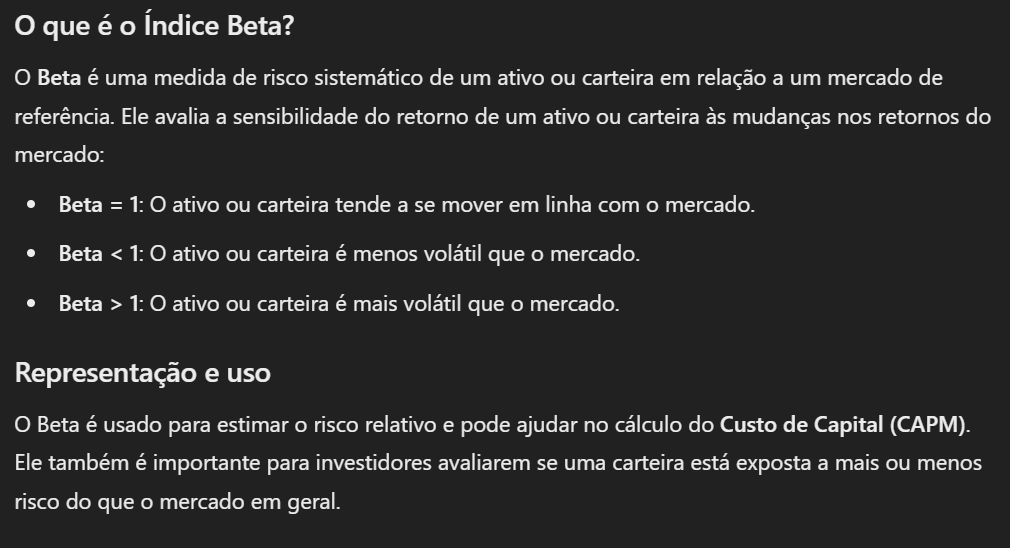

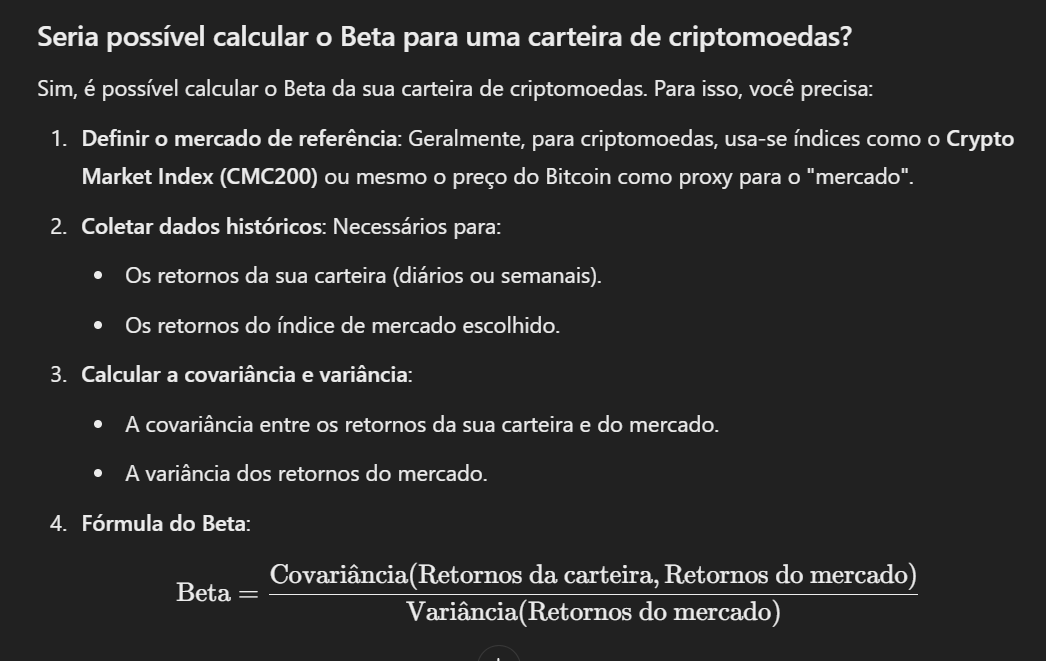

In [29]:
import yfinance as yf
import numpy as np
import pandas as pd

# Baixar dados históricos do CMC200 (índice de referência)
cmc200_data = yf.download("^CMC200", start="2021-12-30", end="2023-12-30", interval="1d")["Adj Close"]
cmc200_returns = cmc200_data.pct_change().dropna()

# Alinhar os retornos da carteira com os do índice CMC200
aligned_data = pd.concat([portfolio_returns['Total_Returns'], cmc200_returns], axis=1).dropna()
aligned_data.columns = ['Portfolio', 'CMC200']

# Calcular covariância e variância
cov_matrix = np.cov(aligned_data['Portfolio'], aligned_data['CMC200'])
cov_portfolio_cmc200 = cov_matrix[0, 1]  # Covariância entre carteira e o CMC200
var_cmc200 = np.var(aligned_data['CMC200'])  # Variância do CMC200

# Calcular Beta
beta = cov_portfolio_cmc200 / var_cmc200

print(f"O Beta da carteira em relação ao CMC200 é: {beta:.4f}")


[*********************100%***********************]  1 of 1 completed

O Beta da carteira em relação ao CMC200 é: -0.0018


##### **6. Definindo o Benchmark**

- Como o **BitCoin** é a crypto mais famosa, decidimos superá-la no período de teste;

- A ideia é que nossa carteria seja uma opção alternativa e rentável em comparação com ao **BitCoin**;

[*********************100%***********************]  1 of 1 completed

Retorno total do Bitcoin no período: -10.76%


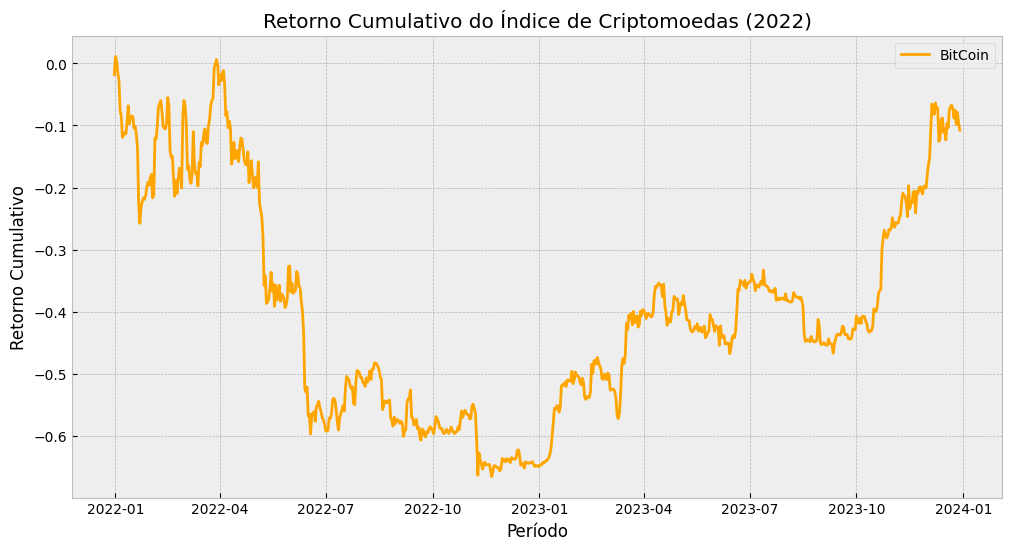

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configurações do índice
crypto_symbols = ["BTC-USD"]
start_date_index = "2021-12-30"
end_date_index = "2023-12-30"

# Baixar dados históricos ajustados de fechamento para as criptomoedas no período de teste
crypto_data = yf.download(crypto_symbols, start=start_date_index, end=end_date_index)["Adj Close"]

# Calcular os retornos diários de cada criptomoeda e remover valores ausentes
crypto_returns = crypto_data.pct_change().dropna()

crypto_index = ((1 + crypto_returns).cumprod()) - 1 # Retorno cumulativo

# Exibir o retorno total do índice no período de teste
print(f"Retorno total do Bitcoin no período: {crypto_index.iloc[-1].item() * 100:.2f}%")

# Plotar o retorno do índice de criptomoedas para 2022
plt.style.use('bmh')
plt.figure(figsize=(12, 6))
plt.plot(crypto_index, label='BitCoin', color='orange')
plt.title("Retorno Cumulativo do Índice de Criptomoedas")
plt.xlabel("Período")
plt.ylabel("Retorno Cumulativo")
plt.legend()
plt.show()

##### **7. Comparando com a Carteria**

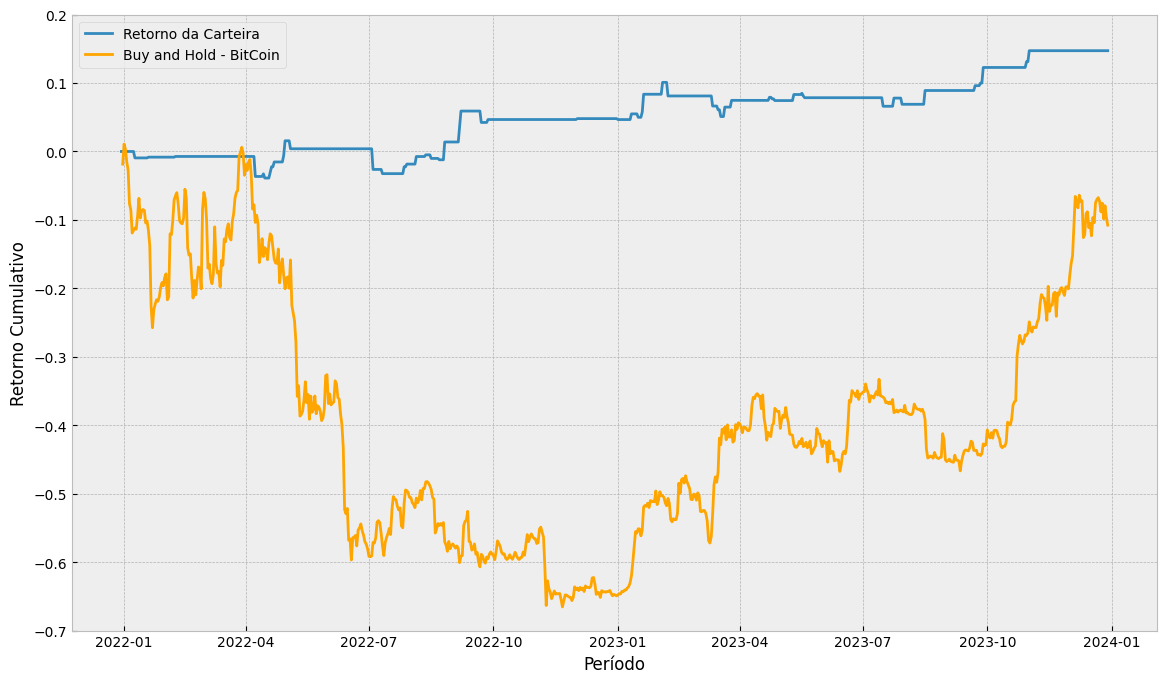

In [9]:
# Plotar os retornos
plt.style.use('bmh')
plt.figure(figsize=(14, 8))
plt.plot(portfolio_cumulative_returns, label="Retorno da Carteira")
plt.plot(crypto_index, label='Buy and Hold - BitCoin', color='orange')
plt.ylim([-0.7, 0.2])
plt.xlabel('Período')
plt.ylabel('Retorno Cumulativo')
plt.legend()
plt.show()

##### **8. Projetando Estratégia**

- Faremos uma projeção da carteira de *30/12/2021* a *30/06/2024*.

- Vamos começar prevendo os preços de cada crypto da carteira no período de *31/12/2023* a *30/06/2024*.

[*********************100%***********************]  9 of 9 completed
C:\Users\lucas\AppData\Local\Temp\ipykernel_6368\2722556547.py:23: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['Signal'][short_window:] = np.where(signals['Short_

Melhor janela para BCN-USD: Curta=10, Longa=150
Melhor janela para EOS-USD: Curta=10, Longa=100
Melhor janela para FCT-USD: Curta=10, Longa=100


C:\Users\lucas\AppData\Local\Temp\ipykernel_6368\2722556547.py:23: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['Signal'][short_window:] = np.where(signals['Short_MA'][short_window:] > signals['Long_MA'][short_window:], 1.0, -1.0)
C

Melhor janela para LSK-USD: Curta=20, Longa=250
Melhor janela para XEM-USD: Curta=40, Longa=100
Melhor janela para STRAX-USD: Curta=10, Longa=100
Melhor janela para USDT-USD: Curta=10, Longa=250


C:\Users\lucas\AppData\Local\Temp\ipykernel_6368\2722556547.py:23: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['Signal'][short_window:] = np.where(signals['Short_MA'][short_window:] > signals['Long_MA'][short_window:], 1.0, -1.0)
C

Melhor janela para DASH-USD: Curta=10, Longa=100
Melhor janela para REP-USD: Curta=10, Longa=200


[*********************100%***********************]  9 of 9 completed
C:\Users\lucas\AppData\Local\Temp\ipykernel_6368\2722556547.py:23: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['Signal'][short_window:] = np.where(signals['Short_


Retornos da estratégia de média móvel no período de teste (2022 a 2023):
BCN-USD: 14.28%
EOS-USD: 28.80%
FCT-USD: 51.56%
LSK-USD: 2.50%
XEM-USD: -8.78%
STRAX-USD: 36.11%
USDT-USD: 0.74%
DASH-USD: 2.45%
REP-USD: 1.08%

Retorno total da carteira: 18.19%
Volatilidade: 0.32%, Sharpe Ratio: 0.06


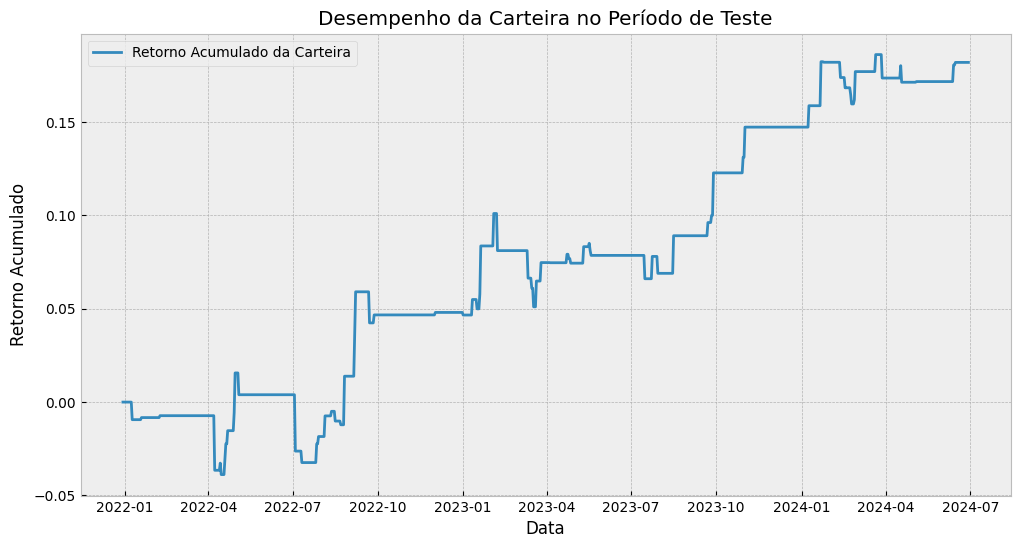

In [32]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configurações da estratégia
#tickers = ['BCN-USD', 'ETH-USD', 'EOS-USD', 'FCT-USD', 'LSK-USD', 'XEM-USD', 'STRAX-USD', 'USDT-USD', 'DASH-USD', 'REP-USD']
tickers = ['BCN-USD', 'EOS-USD', 'FCT-USD', 'LSK-USD', 'XEM-USD', 'STRAX-USD', 'USDT-USD', 'DASH-USD', 'REP-USD']
start_date_train = "2017-12-30"
end_date_train = "2021-12-30"
start_date_test = "2021-12-30"
end_date_test = "2024-06-30"

# Função para executar a estratégia de média móvel
def moving_average_strategy(data, short_window=50, long_window=200):
    signals = pd.DataFrame(index=data.index)
    signals['Price'] = data
    signals['Short_MA'] = data.rolling(window=short_window).mean()
    signals['Long_MA'] = data.rolling(window=long_window).mean()
    signals['Signal'] = 0.0

    # Gerar sinais de compra (+1) e venda (-1)
    signals['Signal'][short_window:] = np.where(signals['Short_MA'][short_window:] > signals['Long_MA'][short_window:], 1.0, -1.0)
    signals['Position'] = signals['Signal'].diff()  # Identifica mudanças nos sinais

    return signals

# Baixar dados históricos de treinamento
dados_train = yf.download(tickers, start=start_date_train, end=end_date_train, interval="1d")["Adj Close"]

# Otimizar a estratégia para encontrar os melhores parâmetros de janela
best_params = {}
for ticker in tickers:
    data = dados_train[ticker].dropna()
    best_return = -np.inf
    best_short_window = None
    best_long_window = None
    
    for short_window in range(10, 60, 10):
        for long_window in range(100, 300, 50):
            signals = moving_average_strategy(data, short_window, long_window)
            returns = (1 + signals['Position'] * data.pct_change().clip(lower=-1, upper=1)).cumprod().iloc[-1] - 1
            
            if returns > best_return:
                best_return = returns
                best_short_window = short_window
                best_long_window = long_window
    
    best_params[ticker] = (best_short_window, best_long_window)
    print(f"Melhor janela para {ticker}: Curta={best_short_window}, Longa={best_long_window}")

# Testar a estratégia com os melhores parâmetros
dados_test = yf.download(tickers, start=start_date_test, end=end_date_test, interval="1d")["Adj Close"]
strategy_results = {}
portfolio_returns = pd.DataFrame(index=dados_test.index)
"""pesos = {
    "BCN-USD": (8.739858/100),
    "ETH-USD": (37.253687/100),
    "EOS-USD": (5.931666/100),
    "FCT-USD": (8.904076/100),
    "LSK-USD": (8.068680/100),
    "XEM-USD": (7.947950/100),
    "STRAX-USD": (8.214806/100),
    "USDT-USD": (0.189218/100),
    "DASH-USD": (7.968406/100),
    "REP-USD": (6.781650/100)
}"""

pesos = {
    "BCN-USD": 0.13928880,
    "EOS-USD": 0.09453410,
    "FCT-USD": 0.14190597,
    "LSK-USD": 0.12859211,
    "XEM-USD": 0.12666801,
    "STRAX-USD": 0.13092094,
    "USDT-USD": 0.00301561,
    "DASH-USD": 0.12699402,
    "REP-USD": 0.10808046
}

for ticker in tickers:
    data_test = dados_test[ticker].dropna()
    short_window, long_window = best_params[ticker]
    signals = moving_average_strategy(data_test, short_window, long_window)
    
    # Calcular os retornos da estratégia
    daily_returns = data_test.pct_change().clip(lower=-1, upper=1)
    signals['Strategy_Returns'] = signals['Position'] * daily_returns
    
    strategy_results[ticker] = (1 + signals['Strategy_Returns']).cumprod() - 1
    portfolio_returns[ticker] = signals['Strategy_Returns']

# Calcular o retorno da carteira
portfolio_returns['Total_Returns'] = portfolio_returns.mul(list(pesos.values()), axis=1).sum(axis=1)
portfolio_cumulative_returns = (1 + portfolio_returns['Total_Returns']).cumprod() - 1

# Métricas de avaliação
volatility = portfolio_returns['Total_Returns'].std()
sharpe_ratio = portfolio_returns['Total_Returns'].mean() / volatility

print("\nRetornos da estratégia de média móvel no período de teste (2022 a 2023):")
for ticker, returns in strategy_results.items():
    print(f"{ticker}: {returns.iloc[-1]:.2%}")

print(f"\nRetorno total da carteira: {portfolio_cumulative_returns.iloc[-1]:.2%}")
print(f"Volatilidade: {volatility:.2%}, Sharpe Ratio: {sharpe_ratio:.2f}")

# Gráfico do retorno total da carteira
plt.style.use('bmh')
plt.figure(figsize=(12, 6))
plt.plot(portfolio_cumulative_returns, label="Retorno Acumulado da Carteira")
plt.title("Desempenho da Carteira no Período de Teste")
plt.xlabel("Data")
plt.ylabel("Retorno Acumulado")
plt.legend()
plt.show()